In [68]:
import random
import simpy
import numpy as np
import matplotlib.pyplot as plt

SEED = 42
average_processing_time = 25

response_times =[]
queue_lengths = []
waiting_times = []

concurrency = 100
num_cores = 4

In [69]:

class Packet():
    def __init__(self,arrival_time= None, processing_time = None, index = None):
        # self.dst = dst
        # self.src = src
        # self.application = app
        self.arrival_time = arrival_time
        self.processing_time = processing_time
        self.index = index

    # def packet_get_dst(self):
    #     return self.dst

    # def packet_get_src(self):
    #     return self.src

    # def packet_get_application(self):
    #     return self.application

    def packet_get_arrival_time(self):
        return self.arrival_time

    def packet_get_processing_time(self):
        return self.processing_time

    def packet_get_index(self):
        return self.index

    def packet_set_processing_time(self, processing_time):
        self.processing_time = processing_time

    def packet_set_index(self, index):
        self.index = index

    def packet_set_arrival_time(self, arrival_time):
        self.arrival_time = arrival_time

# Class client:
# processing_time
class Client():
    # initial with parameters:
    def __init__(self, env, out_pipe, in_pipe, index):
        self.env = env
        self.out_pipe = out_pipe
        self.in_pipe = in_pipe
        self.index = index
        self.action = env.process(self.run())
        self.request = Packet()

    #prepare the request to send
    def prepare_request(self):
        processing_time = random.expovariate(1/average_processing_time)
        arrival_time = self.env.now
        self.request.packet_set_processing_time(processing_time)
        self.request.packet_set_index(self.index)
        self.request.packet_set_arrival_time(arrival_time)

    # send the request:
    def send_request(self):
        self.out_pipe.put(self.request)

    def analyse_response(self, response):
        response_time = self.env.now - response.packet_get_arrival_time()
        response_times.append(response_time)

    def run(self):
        while True:
            self.prepare_request()
            self.send_request()
            print("process = " + str(self.request.packet_get_processing_time()))
            print("index = " + str(self.request.packet_get_index()))
            print("arrival =" + str(self.request.packet_get_arrival_time()))
            
            #wait for the request to comeback:
            response = yield self.in_pipe.get(filter=lambda x: True if x.packet_get_index() == self.index else False)
            self.analyse_response(response)

class Server():
    def __init__(self, env, in_pipe, out_pipe, index):
        self.env = env
        self.out_pipe = out_pipe
        self.in_pipe = in_pipe
        self.processing_time = 0
        self.request = Packet()
        self.response = Packet()
        self.index = index
        self.action = env.process(self.run())

    #prepare the request to send
    def process_request(self):
        self.processing_time = self.request.packet_get_processing_time()
        arrival_time = self.request.packet_get_arrival_time()
        waiting_time = self.env.now - arrival_time
        waiting_times.append(waiting_time)
        queue_length = len(self.in_pipe.items)
        queue_lengths.append(queue_length)

    # send the request:
    # def prepare_response(self):
    #     yield self.env.timeout(self.processing_time)

    def send_response(self):
        self.response = self.request
        self.out_pipe.put(self.response)

    def run(self):
        while True:
            #wait for request:
            self.request = yield self.in_pipe.get()
            self.process_request()
            yield self.env.timeout(self.processing_time)
            self.send_response()



In [70]:

random.seed(SEED)

environment = simpy.Environment()
to_server=simpy.Store(environment)
to_client=simpy.FilterStore(environment)

# client = Client(env=environment, out_pipe=to_server, in_pipe=to_client, index=1)
# server = Server(env=environment, in_pipe=to_server, out_pipe=to_client, index=1)
clients = [Client(env=environment, out_pipe=to_server, in_pipe=to_client, index=i) for i in range(concurrency)]
servers = [Server(env=environment, in_pipe=to_server, out_pipe=to_client, index=i) for i in range(num_cores)]



In [71]:
environment.run(10000)


process = 25.501507181870025
index = 0
arrival =0
process = 0.6332209760684723
index = 1
arrival =0
process = 8.040601601874139
index = 2
arrival =0
process = 6.314654641752838
index = 3
arrival =0
process = 33.339816820202074
index = 4
arrival =0
process = 28.229325219964817
index = 5
arrival =0
process = 55.68220248878451
index = 6
arrival =0
process = 2.2738101151641534
index = 7
arrival =0
process = 13.701153984912272
index = 8
arrival =0
process = 0.7562544301839647
index = 9
arrival =0
process = 6.167917398995608
index = 10
arrival =0
process = 17.597888196653834
index = 11
arrival =0
process = 0.6723600920076941
index = 12
arrival =0
process = 5.54229172909201
index = 13
arrival =0
process = 26.23730003056431
index = 14
arrival =0
process = 19.68323135606003
index = 15
arrival =0
process = 6.225660474170591
index = 16
arrival =0
process = 22.245217657544067
index = 17
arrival =0
process = 41.44345235557743
index = 18
arrival =0
process = 0.1629992138566692
index = 19
arrival =0


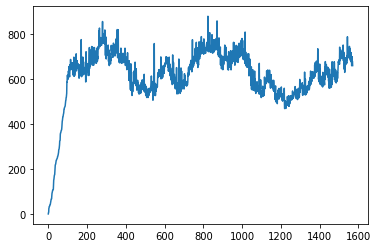

In [72]:
plt.plot(response_times)

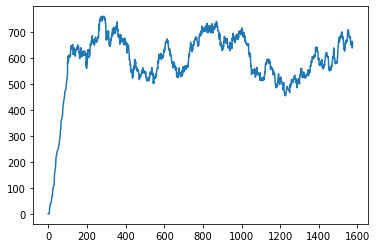

In [73]:
plt.plot(waiting_times)